In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from matplotlib.colors import ListedColormap
from matplotlib.colors import ListedColormap

In [2]:
#reading file
def convertTxtToList():
    f=open("/home/ritik/Desktop/ph2/PH2_dataset.txt", "r")
    lines = f.readlines()
    returnList = []
    for line in lines:
        line = line.replace('||', '|')
        line = line.replace('\n', '')
        lista = list(str(line))
        if len(lista) > 0:
            lista[0] = ''
            lista[len(lista)-1] = ''
            newLine = ''.join(lista)
            arr = newLine.split('|')
            arr = [x.strip() for x in arr]
            if len(arr) > 1:
                returnList.append(arr)
        
    f.close()   
    return returnList

In [3]:
#loading list
clearFile = convertTxtToList()

In [4]:
#convert list to a dataframe
df = pd.DataFrame(clearFile[1:-1], columns=clearFile[0])
df.head(5)

,Name,Histological Diagnosis,Clinical Diagnosis,Asymmetry,Pigment Network,Dots/Globules,Streaks,Regression Areas,Blue-Whitish Veil,Colors
0,IMD003,,0,0,T,A,A,A,A,4
1,IMD009,,0,0,T,A,A,A,A,3
2,IMD016,,0,0,T,T,A,A,A,3 4
3,IMD022,,0,0,T,A,A,A,A,3
4,IMD024,,0,0,T,A,A,A,A,3 4


In [5]:
#number of lines and columns
df.shape

(199, 10)

In [6]:
#creating column ['number colors']
def createNumberColors(row):
    arr = row['Colors'].strip().split(' ')
    arr = [x for x in arr if x != '']
    return len(arr)

df['number colors'] = df.apply(createNumberColors, axis=1)

In [7]:
#removing ['Colors']
df = df.drop('Colors', 1)
df.head(5)


,Name,Histological Diagnosis,Clinical Diagnosis,Asymmetry,Pigment Network,Dots/Globules,Streaks,Regression Areas,Blue-Whitish Veil,number colors
0,IMD003,,0,0,T,A,A,A,A,1
1,IMD009,,0,0,T,A,A,A,A,1
2,IMD016,,0,0,T,T,A,A,A,2
3,IMD022,,0,0,T,A,A,A,A,1
4,IMD024,,0,0,T,A,A,A,A,2


In [8]:
#normatize ['Pigment Network']
df['Pigment Network'] = df['Pigment Network'].map({'T':1, 'AT':0})
df['Pigment Network'].value_counts()

0    115
1     84
Name: Pigment Network, dtype: int64

In [9]:
#normatize ['Dots/Globules']
df['Dots/Globules'] = df['Dots/Globules'].map({'T':1, 'AT':0, 'A':2})
df['Dots/Globules'].value_counts()

2    86
0    59
1    54
Name: Dots/Globules, dtype: int64

In [10]:
#normatize ['Streaks']
df['Streaks'] = df['Streaks'].map({'A':1, 'P':0})
df['Streaks'].value_counts()

1    169
0     30
Name: Streaks, dtype: int64

In [11]:
#normatize ['Regression Areas']
df['Regression Areas'] = df['Regression Areas'].map({'A':1, 'P':0})
df['Regression Areas'].value_counts()

1    174
0     25
Name: Regression Areas, dtype: int64

In [12]:
#normatize ['Blue-Whitish Veil']
df['Blue-Whitish Veil'] = df['Blue-Whitish Veil'].map({'A':1, 'P':0})
df['Blue-Whitish Veil'].value_counts()

1    164
0     35
Name: Blue-Whitish Veil, dtype: int64

In [13]:
df.head(10)

,Name,Histological Diagnosis,Clinical Diagnosis,Asymmetry,Pigment Network,Dots/Globules,Streaks,Regression Areas,Blue-Whitish Veil,number colors
0,IMD003,,0,0,1,2,1,1,1,1
1,IMD009,,0,0,1,2,1,1,1,1
2,IMD016,,0,0,1,1,1,1,1,2
3,IMD022,,0,0,1,2,1,1,1,1
4,IMD024,,0,0,1,2,1,1,1,2
5,IMD025,,0,0,1,1,1,1,1,1
6,IMD035,,0,2,1,2,1,1,1,2
7,IMD038,,0,0,1,1,1,1,1,2
8,IMD042,,0,0,1,1,1,1,1,2
9,IMD044,,0,0,1,1,1,1,1,2


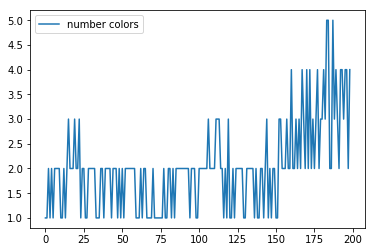

In [14]:
#graphic to check clinical diagnosis with number colors
df[['Clinical Diagnosis', 'number colors']].plot()

In [15]:
#selecting data
x = df.iloc[:,3:10].values
y = df.iloc[:,2].values

In [16]:
#creating test and train matriz
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [17]:
#using scaling for the matrix
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

/home/ritik/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [21]:
#training the algorithm
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn_model=classifier.fit(x_train, y_train)

In [22]:
#using KNN to predict
y_pred = classifier.predict(x_test)

In [23]:
#building confuse matrix
confusion_matrix(y_test, y_pred)

array([[19,  1,  0],
       [ 0, 19,  1],
       [ 1,  1,  8]])

In [25]:
accuracy = knn_model.score(x_test, y_test) 
print('Accuracy:')
print(accuracy)

Accuracy:
0.92
